In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist

Using TensorFlow backend.


In [0]:
def upload_files():
  from google.colab import files
  uploaded = files.upload()
  for k, v in uploaded.items():
    open(k, 'wb').write(v)
  return list(uploaded.keys())

upload_files()

Saving CNNModel.py to CNNModel.py
Saving ConvolutionLayer.py to ConvolutionLayer.py
Saving fashionmnist.py to fashionmnist.py
Saving FullyConnectedLayer.py to FullyConnectedLayer.py
Saving Hyperparameters.py to Hyperparameters.py
Saving MA.py to MA.py
Saving PoolingLayer.py to PoolingLayer.py


['CNNModel.py',
 'ConvolutionLayer.py',
 'fashionmnist.py',
 'FullyConnectedLayer.py',
 'Hyperparameters.py',
 'MA.py',
 'PoolingLayer.py']

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [0]:
x_test.shape

(10000, 28, 28, 1)

In [0]:
np.random.seed(226)
Xtrain = np.empty((30000,28,28,1), dtype='uint8')
Ytrain = np.empty((30000), dtype='uint8')
Xtest = np.empty((5000,28,28,1), dtype='uint8')
Ytest = np.empty((5000), dtype='uint8')

for i in range(30000):
    rnd = np.random.randint(0, x_train.shape[0])
    Xtrain[i,:] = x_train[rnd,:]
    Ytrain[i] = y_train[rnd]

for j in range(5000):
    rnd = np.random.randint(0, y_test.shape[0])
    Xtest[j,:] = x_test[rnd,:]
    Ytest[j] = y_test[rnd]

In [0]:
input_shape = [None, 28, 28, 1]
number_of_classes = 10

#Conver output label to one hot vector
Ytrain = to_categorical(Ytrain, number_of_classes)
Ytest = to_categorical(Ytest, number_of_classes)

In [0]:
Xtrain, Xvalid, Ytrain, Yvalid = train_test_split(Xtrain, Ytrain, 
                                                test_size = 5000, random_state = 42)

print("Shape of training features: {}".format(Xtrain.shape))
print("Shape of training lables: {}".format(Ytrain.shape))
print("Shape of testing features: {}".format(Xvalid.shape))
print("Shape of testing lables: {}".format(Yvalid.shape))

Shape of training features: (25000, 28, 28, 1)
Shape of training lables: (25000, 10)
Shape of testing features: (5000, 28, 28, 1)
Shape of testing lables: (5000, 10)


In [0]:
#Hyper parameters
learning_rate = 0.01
epoch = 50
batch_size = 32

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


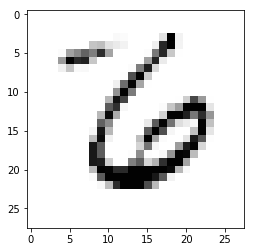

In [0]:
print(Ytrain[1])
plt.imshow(Xtrain[1,:,:,-1], cmap='Greys')

In [0]:
Xtrain = Xtrain.astype('float32')
Xvalid = Xvalid.astype('float32')

In [0]:
import MA as microcanonical

In [0]:
Xvalid.shape

(5000, 28, 28, 1)

In [15]:
parameters = {'x_train': Xtrain , 'y_train': Ytrain, 'x_valid': Xvalid, 'y_valid': Yvalid, 'batch_size':batch_size, 'learning_rate':0.0001}

alg = microcanonical.MA(**parameters)
alg.startAlgorithm()

MAX_SAMP = 1, MAX_INIT = 9, MAX_REJEC_MOV = 5
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 25000 samples, validate on 5000 samples
Epoch 1/5
25000/25000 [==============================] - 13s 515us/step - loss: 0.8348 - acc: 0.7480 - val_loss: 0.1368 - val_acc: 0.9636
Epoch 2/5
25000/25000 [==============================] - 9s 345us/step - loss: 0.2283 - acc: 0.9357 - val_loss: 0.0966 - val_acc: 0.9742
Epoch 3/5
25000/25000 [==============================] - 9s 344us/step - loss: 0.1595 - acc: 0.9562 - val_loss: 0.0785 - val_acc: 0.9794
Epoch 4/5
25000/25000 [==============================] - 9s 345us/step - loss: 0.1258 - acc: 0.9674 - val_loss: 0.0649 - val_acc: 0.9864
Epoch 5/5
25000/25000 [==============================] - 9s 346us/step - loss: 0.1073 - acc: 0.9730 - val_loss: 0.0649 - 

In [0]:
!cp model_0.json gdrive/My\ Drive/Colab\ Notebooks/MA_VGG_Keras/

In [0]:
!cp model_1.json gdrive/My\ Drive/Colab\ Notebooks/MA_VGG_Keras/

In [0]:
!cp model_2.json gdrive/My\ Drive/Colab\ Notebooks/MA_VGG_Keras/

In [0]:
!cp model_3.json gdrive/My\ Drive/Colab\ Notebooks/MA_VGG_Keras/

In [0]:
!cp model_4.json gdrive/My\ Drive/Colab\ Notebooks/MA_VGG_Keras/